In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('daily_min_temp.csv', index_col='Date', parse_dates=['Date'])
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# Resampling Data Time Series

<Axes: xlabel='Date'>

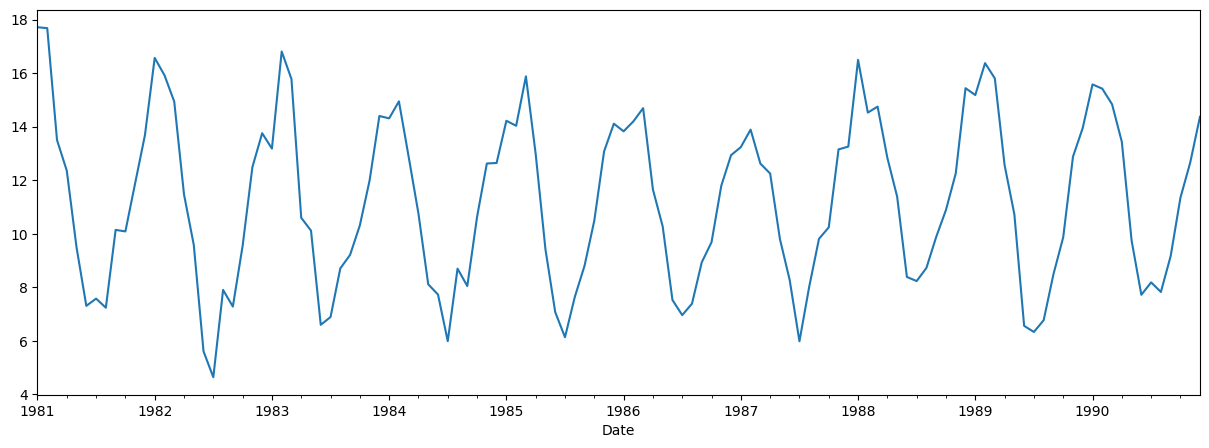

In [7]:
df = df.resample('ME').mean()
df.Temp.plot(figsize=(15, 5))

# Naive Forecasting

## One-shift

In [8]:
pred = df.copy()
pred.Temp = df.Temp.shift(1)

,Temp
Date,
1981-01-31,NaN
1981-02-28,17.712903
1981-03-31,17.678571
1981-04-30,13.500000
1981-05-31,12.356667
...,...
1990-08-31,8.183871
1990-09-30,7.825806
1990-10-31,9.166667


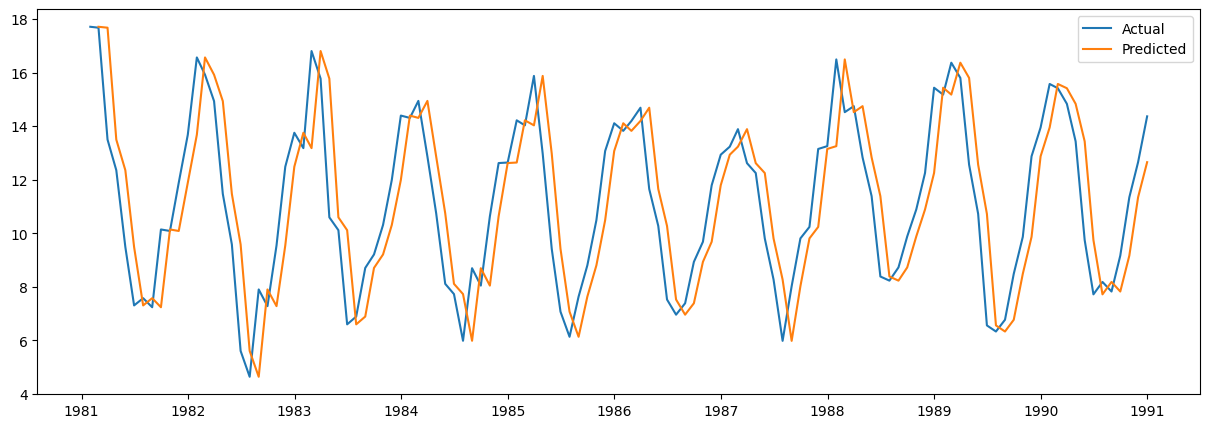

In [10]:
plt.figure(figsize=(15, 5))
plt.plot(df.Temp, label='Actual')
plt.plot(pred.Temp, label='Predicted')
plt.legend()

## Mean as Forecast

In [14]:
df = df.copy()
pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift()

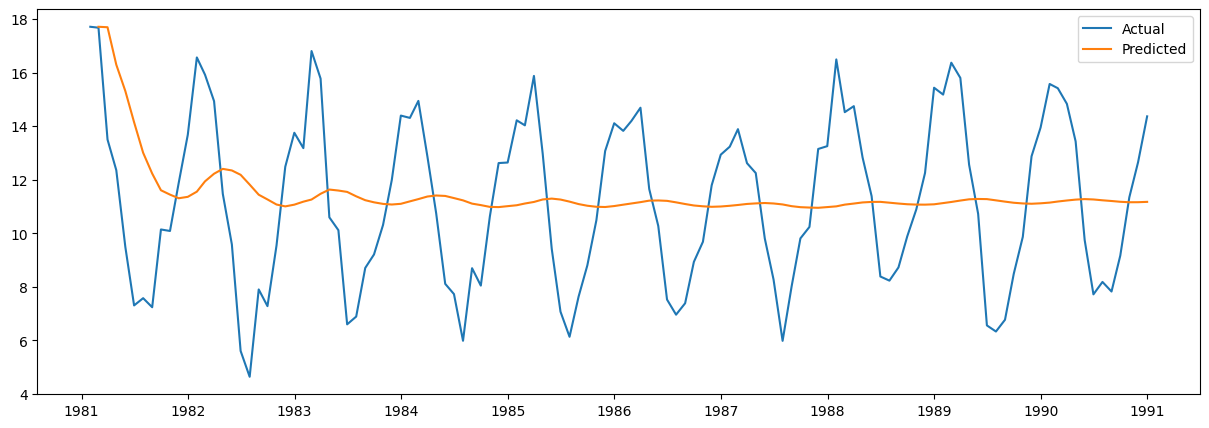

In [15]:
plt.figure(figsize=(15, 5))
plt.plot(df.Temp, label='Actual')
plt.plot(pred.Temp, label='Predicted')
plt.legend()

## Moving Average

In [17]:
pred = df.copy()
pred.Temp = df.rolling(3).mean()
pred = pred.shift()

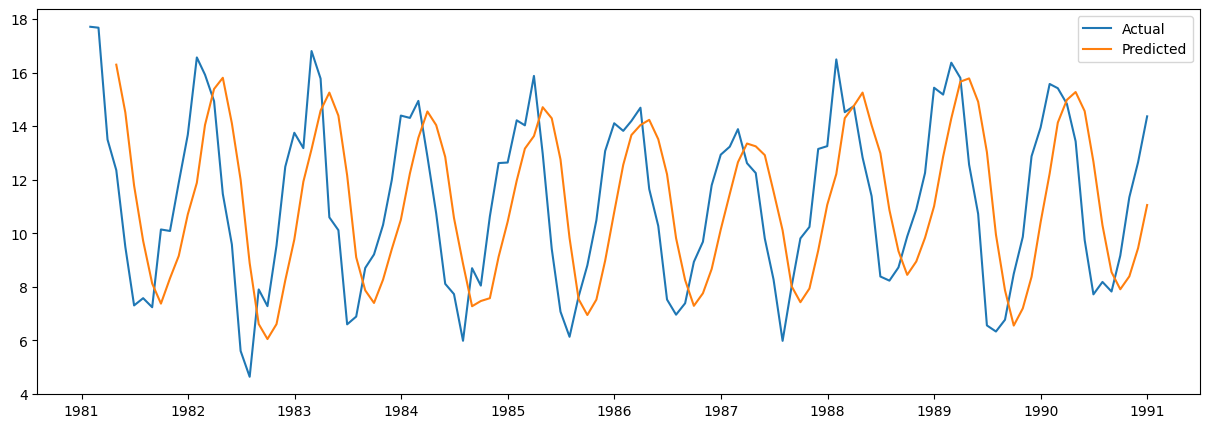

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df.Temp, label='Actual')
plt.plot(pred.Temp, label='Predicted')
plt.legend()